In [9]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/dados_limpos.csv"
dados = pd.read_csv(url, sep=",")

warnings.filterwarnings("ignore")

#dados = pd.read_csv(url, on_bad_lines="skip", sep=";") #lida com linhas com algum espaço vazio
dados.columns

Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'UF', 'Municipio', 'Regiao', 'PIB_PerCapita',
       'Densidade_Populacional', 'Proporcao_PessoalAssalariado',
       'Proporcao_Area_Plantada'],
      dtype='object')

 # 📊 💰**Impacto do PIB Municipal e das Transferências nas Finanças dos Municípios**


Neste tópico, foi realizada uma análise em relação ao PIB municipal, à receita e à dependência das transferências nos municípios. A partir dos dados disponíveis no dataset, investigaram-se os impactos dessas variáveis na autonomia financeira das cidades. O estudo busca compreender como o desempenho econômico local influencia a dependência de transferências externas e o índice de autonomia financeira.



## 🔷 Análise estatística e descritiva dos dados

Inicialmente, para essa análise, foram criadas novas variáveis auxiliares. Para estimar a receita própria dos municípios — que compreende os valores não dependentes de repasses — foi criada a variável "Receita_Propria", calculada subtraindo-se as transferências correntes e de capital das receitas totais. Em seguida, calcularam-se o índice de dependência das transferências, que expressa a proporção das transferências em relação às receitas totais, e o índice de autonomia, que reflete a proporção da receita própria sobre o total das receitas.

Para evitar divisões por zero, aplicaram-se condições que resultam em valores ausentes (NaN) quando necessário. Além disso, não foram consideradas colunas com valores iguais a zero nem percentuais fora do intervalo entre 0% e 100%, por serem representativos de outliers, inconsistências nos dados ou possíveis ruídos.

Por fim, foram geradas estatísticas descritivas das variáveis selecionadas, apresentando dados como PIB, receitas, transferências e índices de dependência e autonomia. Os valores foram formatados com duas casas decimais e separadores de milhar para melhor visualização.

In [20]:
import pandas as pd
import numpy as np
from IPython.display import HTML

dados['Receita_Propria'] = dados['Receitas_R$'] - (
    dados['Transferencias_correntes_R$'] + dados['Transferencias_capital_R$']
)

dados['Dependencia_Transferencias'] = np.where(
    (dados['Receitas_R$'] != 0) &
    (dados['Transferencias_correntes_R$'] != 0) &
    (dados['Transferencias_capital_R$'] != 0),
    (dados['Transferencias_correntes_R$'] + dados['Transferencias_capital_R$']) / dados['Receitas_R$'] * 100,
    np.nan
)

dados['Indice_Autonomia'] = np.where(
    (dados['Receitas_R$'] != 0) &
    (dados['Receita_Propria'] != 0),
    (dados['Receita_Propria'] / dados['Receitas_R$']) * 100,
    np.nan
)

colunas_analise = [
    'PIB',
    'Receitas_R$',
    'Receita_Propria',
    'Transferencias_correntes_R$',
    'Transferencias_capital_R$',
    'Dependencia_Transferencias',
    'Indice_Autonomia'
]

dados_filtrados = dados[colunas_analise].replace(0, np.nan).dropna()

dados_filtrados = dados_filtrados[
    (dados_filtrados['Dependencia_Transferencias'] >= 0) &
    (dados_filtrados['Dependencia_Transferencias'] <= 100) &
    (dados_filtrados['Indice_Autonomia'] >= 0) &
    (dados_filtrados['Indice_Autonomia'] <= 100)
]

estatisticas = dados_filtrados.describe().round(2)



A partir do código acima, foi criada uma tabela contendo os dados referentes às variáveis de dependência de transferências e índice de autonomia. Para uma melhor visualização, ela foi formatada e está disponibilizada abaixo.



| Estatística | PIB             | Receitas_R$     | Receita_Propria   | Transferências Correntes | Transferências de Capital | Dependência de Transferências (%) | Índice de Autonomia (%) |
|-------------|-----------------|------------------|--------------------|---------------------------|----------------------------|-----------------------------------|--------------------------|
| count       | 19,717.00       | 19,717.00         | 19,717.00           | 19,717.00                  | 19,717.00                   | 19,717.00                         | 19,717.00                |
| mean        | 1,270,013.22    | 131,940,020.98    | 51,512,437.19       | 78,306,290.21              | 2,121,293.59                | 79.71                             | 20.29                    |
| std         | 12,130,680.41   | 988,974,600.70    | 664,227,675.28      | 329,112,329.66             | 12,408,790.67               | 10.58                             | 10.58                    |
| min         | 11,679.00       | 9,361,471.07      | 2,352.30            | 19,910.54                  | 0.03                        | 2.80                              | 0.02                     |
| 25%         | 84,902.00       | 22,731,282.41     | 3,387,341.89        | 18,110,095.64              | 414,696.50                  | 74.56                             | 13.02                    |
| 50% (mediana)| 189,957.00     | 38,898,906.85     | 6,708,898.78        | 30,435,331.16              | 911,212.69                  | 81.92                             | 18.08                    |
| 75%         | 516,667.00      | 78,802,780.81     | 16,795,204.19       | 59,082,591.47              | 1,941,103.56                | 86.98                             | 25.44                    |
| max         | 763,597,808.00  | 64,853,086,202.24 | 45,769,209,411.92   | 18,498,539,693.43          | 837,672,008.56              | 99.98                             | 97.20                    |


Com o objetivo de analisar os aspectos dos municípios que apresentam maior dependência de transferências e maior índice de autonomia, foi elaborada uma tabela com elementos que auxiliam na compreensão desses valores. Esses dados permitem observar possíveis correlações e chegar a conclusões relevantes. A seguir, apresentam-se as tabelas dos municípios com os respectivos resultados.

In [11]:
import pandas as pd
from IPython.display import HTML

idx_maior_dependencia = dados_filtrados['Dependencia_Transferencias'].idxmax()


maior_dependencia = dados.loc[idx_maior_dependencia]
municipio_nome = maior_dependencia['Municipio']
ano_maior_dependencia = maior_dependencia['Ano']

colunas_resultado = [
    'Municipio', 'Ano', 'Populacao', 'Area', 'PIB',
    'Receitas_R$', 'Transferencias_correntes_R$',
    'Transferencias_capital_R$', 'Receita_Propria',
    'Dependencia_Transferencias'
]

resultado = pd.DataFrame([dados.loc[idx_maior_dependencia, colunas_resultado]])

tabela_estilizada = resultado.style \
    .format({
        'Receitas_R$': "R$ {:,.2f}",
        'Receita_Propria': "R$ {:,.2f}",
        'Transferencias_correntes_R$': "R$ {:,.2f}",
        'Transferencias_capital_R$': "R$ {:,.2f}",
        'Populacao': "{:,}",
        'Area': "{:,.2f}",
        'PIB': "{:,.2f}",
        'Dependencia_Transferencias': "{:.2f}%"
    }, na_rep="-") \
    .set_caption(f"Município com Maior Dependência Financeira: {municipio_nome} ({ano_maior_dependencia})") \
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#e0e0e0'), ('color', 'black'), ('text-align', 'center')]},
        {'selector': 'tbody th', 'props': [('background-color', '#e0e0e0'), ('color', 'black'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black'), ('text-align', 'center')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-weight', 'bold'), ('font-size', '16px')]}
    ])

# Exibir a tabela final
#HTML(tabela_estilizada.to_html())

Ao executar o código, foi possível analisar os dados referentes ao município com maior dependência financeira — Amorinópolis. Observa-se que se trata de uma cidade pequena, com poucos habitantes e, consequentemente, com um PIB baixo, o que se reflete em suas receitas e, assim, na sua dependência de transferências.

### 🔸Município com Maior Dependência Financeira: Amorinópolis (2019)
| Município    | Ano  | População | Área (km²) | PIB (R\$)     | Receitas (R\$)    | Transferências Correntes (R\$) | Transferências Capital (R\$) | Receita Própria (R\$) | Dependência Transferências (%) |
|-------------|------|-----------|------------|--------------|-----------------|------------------------------|----------------------------|-------------------|------------------------------|
| Amorinópolis | 2019 | 3.126,0   | 408,50     | 67.192,00    | R\$ 15.635.108,18 | R\$ 15.510.380,83             | R\$ 122.375,05              | R\$ 2.352,30        | 99,98%                       |

In [12]:
import pandas as pd
from IPython.display import HTML


idx_maior_dependencia = dados_filtrados['Indice_Autonomia'].idxmax()

maior_dependencia = dados.loc[idx_maior_dependencia]
municipio_nome = maior_dependencia['Municipio']
ano_maior_dependencia = maior_dependencia['Ano']

colunas_resultado = [
    'Municipio', 'Ano', 'Populacao', 'Area', 'PIB',
    'Receitas_R$', 'Transferencias_correntes_R$',
    'Transferencias_capital_R$', 'Receita_Propria',
    'Indice_Autonomia'
]

resultado = pd.DataFrame([dados.loc[idx_maior_dependencia, colunas_resultado]])

tabela_estilizada = resultado.style \
    .format({
        'Receitas_R$': "R$ {:,.2f}",
        'Receita_Propria': "R$ {:,.2f}",
        'Transferencias_correntes_R$': "R$ {:,.2f}",
        'Transferencias_capital_R$': "R$ {:,.2f}",
        'Populacao': "{:,}",
        'Area': "{:,.2f}",
        'PIB' : "{:,.2f}",
        'Indice_Autonomia': "{:.2f}%"
    }, na_rep="-") \
    .set_caption(f"Município com Maior Dependência Financeira: {municipio_nome} ({ano_maior_dependencia})") \
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#e0e0e0'), ('color', 'black'), ('text-align', 'center')]},
        {'selector': 'tbody th', 'props': [('background-color', '#e0e0e0'), ('color', 'black'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black'), ('text-align', 'center')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-weight', 'bold'), ('font-size', '16px')]}
    ])

# Exibir a tabela final
#HTML(tabela_estilizada.to_html())

Contudo, ao analisar o município com maior autonomia financeira, observou-se um resultado não tão distinto: trata-se de uma cidade relativamente pequena, embora maior que aquela com maior dependência financeira. Isso pode indicar que o tamanho da população não influencia diretamente essa variável, sendo possível que existam cidades menores, com um PIB não tão elevado, mas ainda assim autossuficientes.

### 🔸Município com Maior Autonomia Financeira: Capinzal do Norte (2019)

| Município         | Ano  | População | Área (km²) | PIB (R\$)     | Receitas (R\$)    | Transferências Correntes (R\$) | Transferências Capital (R\$) | Receita Própria (R\$) | Índice Autonomia (%) |
|------------------|------|-----------|------------|--------------|-----------------|------------------------------|----------------------------|-------------------|---------------------|
| Capinzal do Norte | 2016 | 10.716,0  | 590,50     | 111.711,00   | R\$ 34.666.270,60 | R\$ 19.910,54                 | R$ 949.694,39              | R\$ 33.696.665,67   | 97,20%              |

## 🔷 Análise gráfica dos dados

A partir dos resultados encontrados na estatística descritiva, neste tópico serão apresentados alguns gráficos baseados nos dados analisados e nos resultados obtidos, com o objetivo de compreender suas correlações e iniciar o processo de resposta à pergunta levantada.

Para a construção dos gráficos, foram aplicados filtros apropriados conforme o interesse da análise, desconsiderando colunas sem preenchimento ou com valores não significativos. Os dados foram agrupados por região e ano, e foram utilizadas escalas diferentes para melhorar a visualização. Além disso, os elementos foram divididos em faixas, facilitando a interpretação dos resultados.


**Pergunta: Existe relação entre maior PIB municipal, maior receita própria e menor dependência de transferências correntes e de capital, e o índice de autonomia financeira nos municípios?**

### 📈💵Gráficos do PIB

A seguir serão apresentados gráficos relacionados ao PIB e suas relações com outras variáveis.

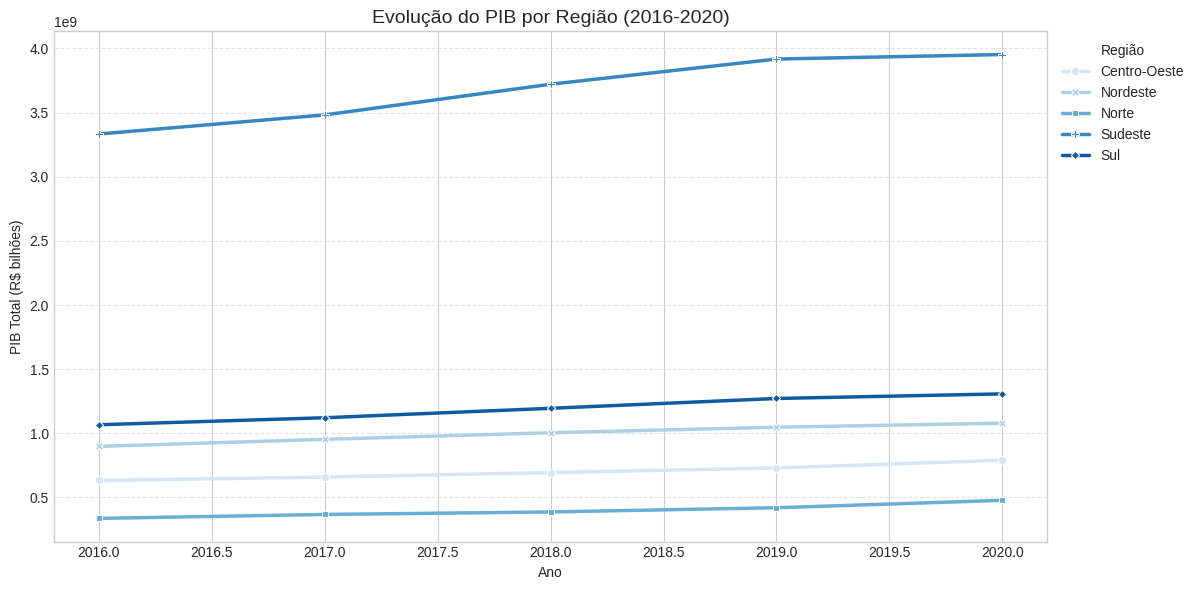

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

pib_regiao = dados.groupby(['Regiao', 'Ano'])['PIB'].sum().reset_index()

pib_regiao = pib_regiao[pib_regiao['PIB'] > 0]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=pib_regiao,
    x='Ano',
    y='PIB',
    hue='Regiao',
    style='Regiao',
    markers=True,
    dashes=False,
    linewidth=2.5,
    palette='Blues'
)
plt.title('Evolução do PIB por Região (2016-2020)', fontsize=14)
plt.ylabel('PIB Total (R$ bilhões)')
plt.xlabel('Ano')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Região', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


É possível observar um crescimento gradual em todas as regiões de 2016 a 2020, com o Sudeste liderando por ampla margem. Entretanto, não foram fornecidos dados do PIB no ano de 2021, logo, não foram considerados

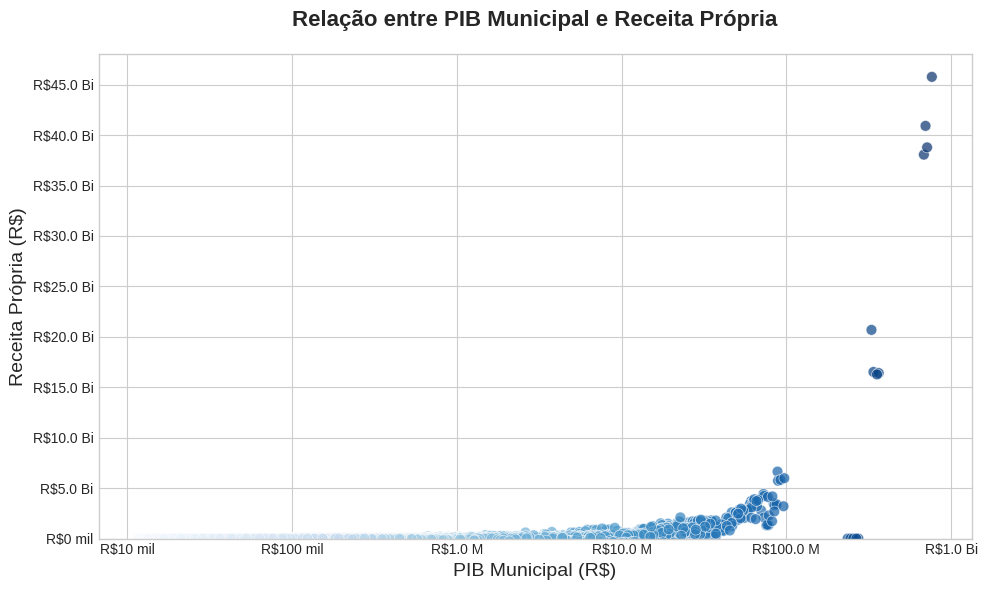

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

dados_filtrados = dados[(dados['PIB'] > 0)]

x = dados_filtrados['PIB']
y = dados_filtrados['Receita_Propria']

cmap = plt.cm.get_cmap('Blues')

scatter = plt.scatter(
    x, y,
    alpha=0.7,
    s=60,
    c=np.log10(x),
    cmap=cmap,
    edgecolor='white',
    linewidth=0.5
)

plt.xscale('log')

plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'R${x/1e9:.1f} Bi' if x >= 1e9 else (f'R${x/1e6:.1f} M' if x >= 1e6 else f'R${x/1e3:.0f} mil'))
)
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'R${x/1e9:.1f} Bi' if x >= 1e9 else (f'R${x/1e6:.1f} M' if x >= 1e6 else f'R${x/1e3:.0f} mil'))
)
plt.gca().yaxis.set_major_locator(MultipleLocator(base=5e9))

plt.title('Relação entre PIB Municipal e Receita Própria', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('PIB Municipal (R$)', fontsize=14)
plt.ylabel('Receita Própria (R$)', fontsize=14)

plt.ylim(0, max(y) * 1.05)

plt.tight_layout()

plt.show()


O gráfico mostra uma correlação positiva entre PIB Municipal e Receita Própria, revelando que municípios com maior PIB conseguem gerar mais receita própria. A distribuição dos dados indica grande desigualdade entre os municípios brasileiros, com a maioria concentrada em valores baixos e poucos alcançando patamares superiores, tanto em PIB quanto em receita.

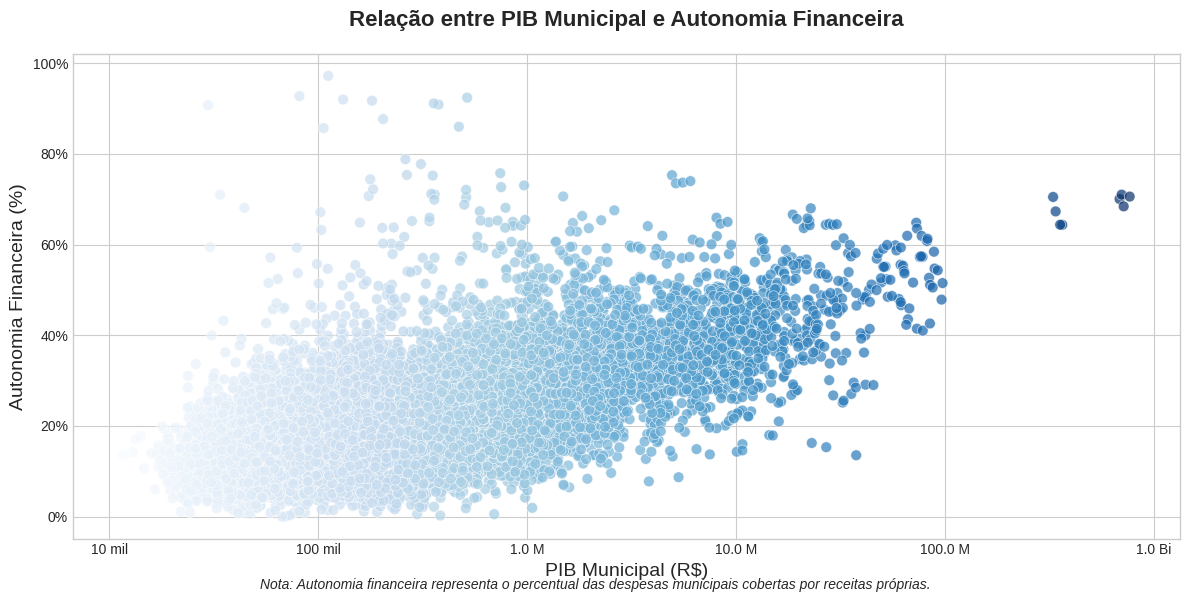

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

x = dados_filtrados['PIB']
y = dados_filtrados['Indice_Autonomia']

cmap = plt.cm.get_cmap('Blues')

scatter = plt.scatter(
    x, y,
    alpha=0.7,
    s=60,
    c=np.log10(x),
    cmap=cmap,
    edgecolor='white',
    linewidth=0.5
)

plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(
    lambda x, pos: f'{x/1e9:.1f} Bi' if x >= 1e9 else (f'{x/1e6:.1f} M' if x >= 1e6 else f'{x/1e3:.0f} mil')))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{y:.0f}%'))



plt.title('Relação entre PIB Municipal e Autonomia Financeira', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('PIB Municipal (R$)', fontsize=14)
plt.ylabel('Autonomia Financeira (%)', fontsize=14)

plt.figtext(0.5, 0.01,
          "Nota: Autonomia financeira representa o percentual das despesas municipais cobertas por receitas próprias.",
          ha="center", fontsize=10, style='italic')

plt.tight_layout()
plt.show()


Ao analisar o gráfico observa-se uma tendência geral de que, à medida que o PIB municipal aumenta, também tende a aumentar a autonomia financeira, embora essa relação não seja estritamente linear. A maioria dos municípios com PIB mais baixo apresenta baixa autonomia financeira — ou seja, dependem mais de transferências externas para cobrir suas despesas. Já entre os municípios com PIB mais elevado, há maior concentração de autonomias financeiras mais altas, indicando maior capacidade de financiar suas próprias despesas com receitas próprias. No entanto, mesmo entre os municípios com PIB elevado, ainda há variações consideráveis, sugerindo que o tamanho da economia local não é o único fator determinante da autonomia financeira.


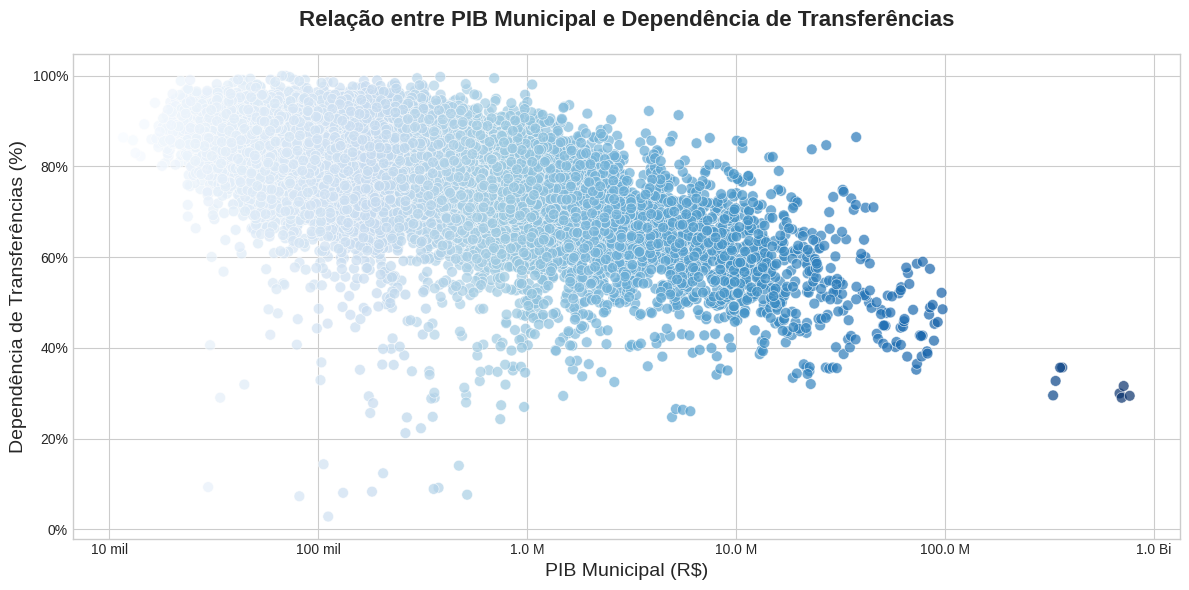

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator


plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

x = dados_filtrados['PIB']
y = dados_filtrados['Dependencia_Transferencias']


cmap = plt.cm.get_cmap('Blues')

scatter = plt.scatter(
    x, y,
    alpha=0.7,
    s=60,
    c=np.log10(x),
    cmap=cmap,
    edgecolor='white',
    linewidth=0.5
)

plt.xscale('log')
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.1f} Bi' if x >= 1e9 else (f'{x/1e6:.1f} M' if x >= 1e6 else f'{x/1e3:.0f} mil'))
)
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x:.0f}%')
)

plt.title('Relação entre PIB Municipal e Dependência de Transferências', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('PIB Municipal (R$)', fontsize=14)
plt.ylabel('Dependência de Transferências (%)', fontsize=14)


plt.tight_layout()

plt.show()


Ao analisar o gráfico é possível observar que, em geral, municípios com PIB mais baixo apresentam maior dependência de transferências governamentais — muitas vezes acima de 80% das suas receitas. À medida que o PIB municipal aumenta, a dependência tende a diminuir, evidenciando que municípios com maior capacidade econômica conseguem financiar uma maior parcela de suas despesas com receitas próprias. A dispersão dos dados, porém, também revela que existem exceções, sugerindo que outros fatores além do PIB influenciam a dependência de transferências.


### 📈⚖️ Gráficos sobre Autonomia Financeira

Neste espaço, são apresentados os gráficos referentes à autonomia financeira. Para a criação e análise dos gráficos, foram utilizados os dados filtrados com base na análise estatística, removendo outliers, desconsiderando valores muito discrepantes e excluindo registros fora do intervalo de 0 a 100%.

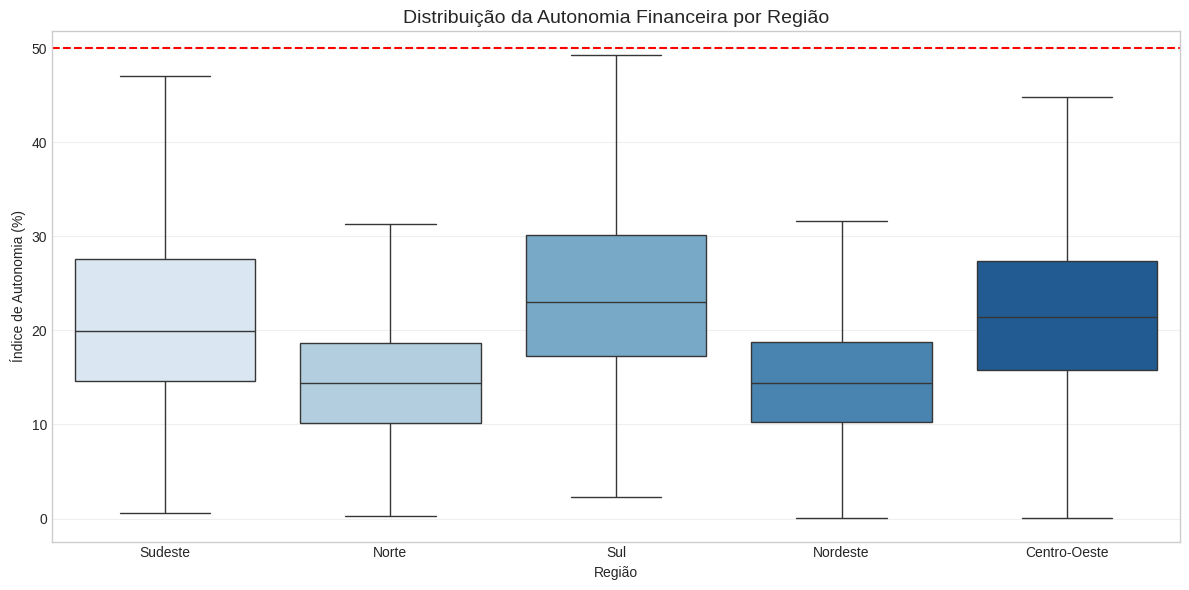

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=dados_filtrados.join(dados[['Regiao']]),
    x='Regiao',
    y='Indice_Autonomia',
    palette='Blues',
    showfliers=False
)
plt.title('Distribuição da Autonomia Financeira por Região', fontsize=14)
plt.xlabel('Região')
plt.ylabel('Índice de Autonomia (%)')
plt.axhline(y=50, color='red', linestyle='--')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


É posśivel observar que a região Sul mostra a maior mediana e também a maior concentração de valores no quartil superior, indicando melhor autonomia financeira nos seus municípios. O Centro-Oeste apresenta uma mediana próxima de 22%, com distribuição relativamente equilibrada. O Sudeste mostra uma mediana em torno de 20%, mas com grande amplitude de valores, sugerindo maior heterogeneidade entre seus municípios. As regiões Norte e Nordeste exibem as menores medianas, confirmando sua maior dependência de transferências governamentais. Notam-se também alguns valores extremos em todas as regiões, particularmente no Sul e Sudeste, onde alguns municípios alcançam autonomia próxima de 50%. Esta análise reforça o padrão de desigualdade regional no Brasil, onde as regiões Sul, Sudeste e Centro-Oeste demonstram maior capacidade de autofinanciamento em comparação às regiões Norte e Nordeste.

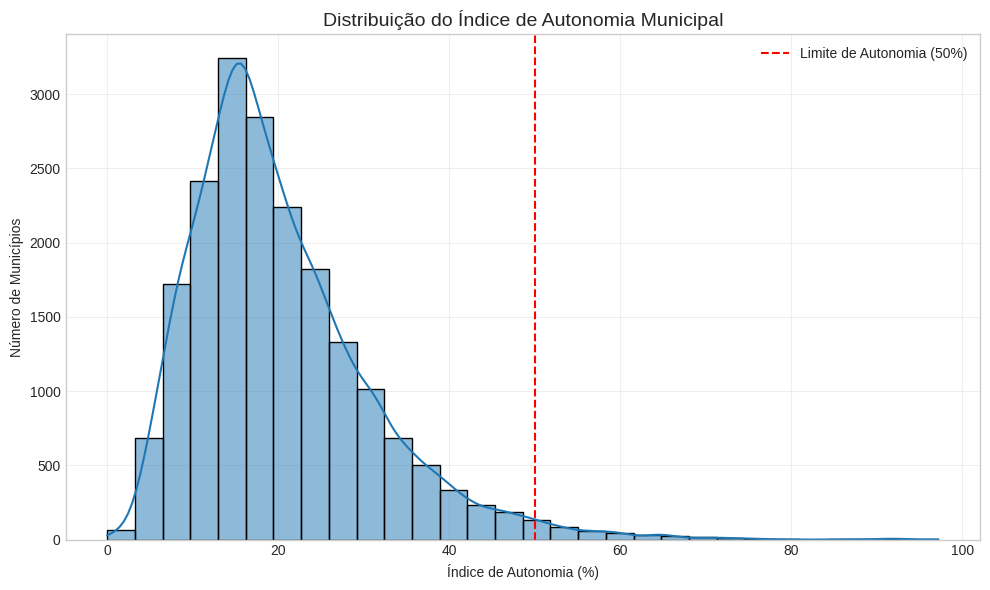

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(
    data=dados_filtrados,
    x='Indice_Autonomia',
    bins=30,
    kde=True,
    color='#1f77b4'
)
plt.axvline(x=50, color='red', linestyle='--', label='Limite de Autonomia (50%)')
plt.title('Distribuição do Índice de Autonomia Municipal', fontsize=14)
plt.xlabel('Índice de Autonomia (%)')
plt.ylabel('Número de Municípios')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


A análise do gráfico revela que a grande maioria dos municípios brasileiros possui baixa autonomia, com índices concentrados entre 10% e 25%. Apenas uma pequena parcela consegue ultrapassar o limite de 50% (linha vermelha), e um número ainda menor alcança níveis próximos a 100%. Isso indica um cenário de forte dependência da maioria dos municípios em relação a transferências de recursos de outras esferas governamentais, contrastando com poucos municípios que conseguem manter maior independência financeira e administrativa.

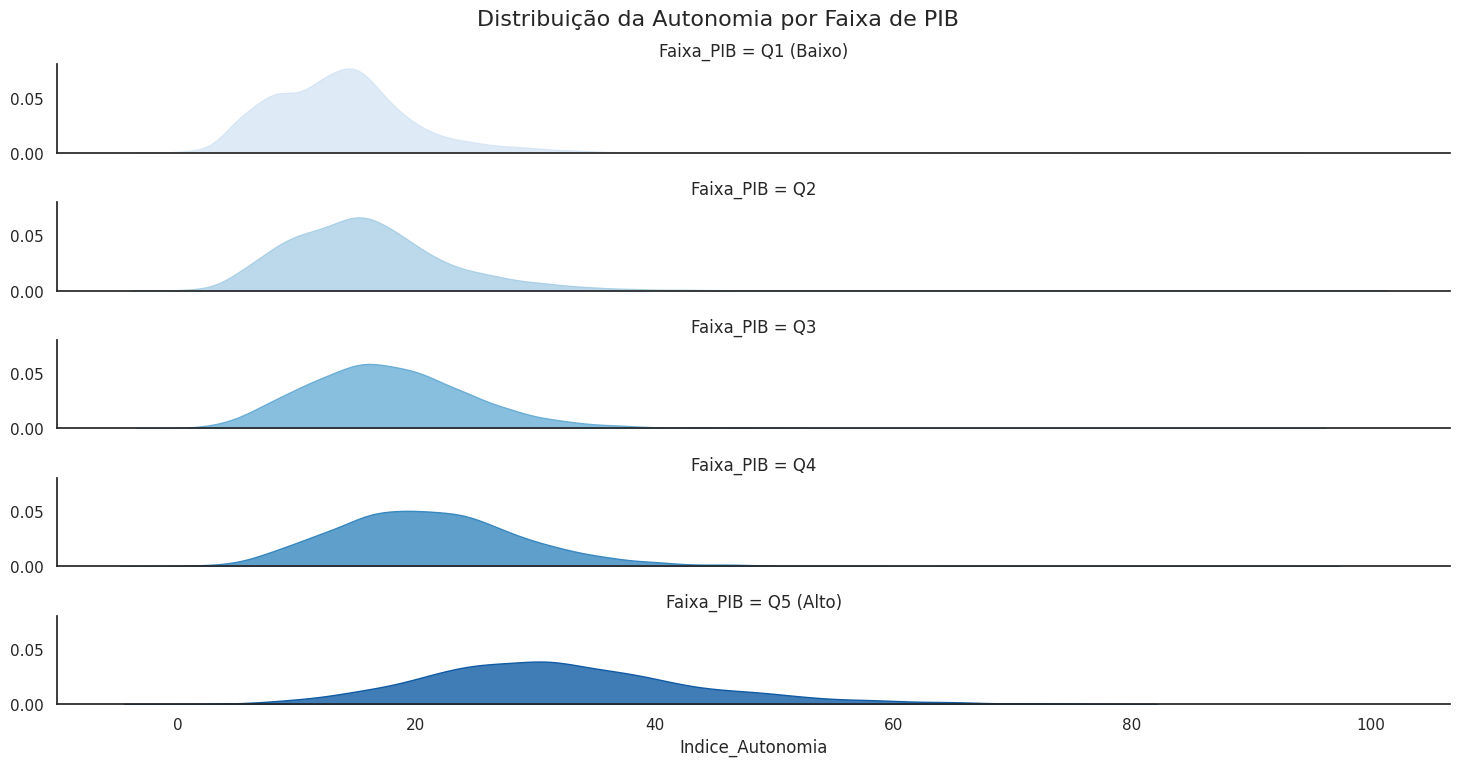

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_filtrados['Faixa_PIB'] = pd.qcut(
    dados_filtrados['PIB'], q=5, labels=['Q1 (Baixo)', 'Q2', 'Q3', 'Q4', 'Q5 (Alto)']
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(
    dados_filtrados,
    row='Faixa_PIB',
    hue='Faixa_PIB',
    aspect=10,
    height=1.5,
    palette='Blues'
)
g.map(sns.kdeplot, 'Indice_Autonomia', fill=True, alpha=0.8)
g.fig.suptitle('Distribuição da Autonomia por Faixa de PIB', y=1.02, fontsize=16)
g.set(ylabel="")


É possível observar que à medida que o PIB municipal aumenta, a autonomia financeira também cresce gradualmente. Municípios mais pobres (Q1-Q2) concentram-se em baixos níveis de autonomia, enquanto os mais ricos (Q5) atingem níveis moderados. Conclui-se que, embora exista uma relação positiva entre capacidade econômica e autonomia, mesmo os municípios mais ricos raramente alcançam altos níveis de independência financeira.

### 📈 📊Gráficos sobre Dependência de Transferências

Neste espaço serão apresentados os gráfios referentes à dependência financeira dos municípios considerando os valores encontrados na estatítisca descritiva

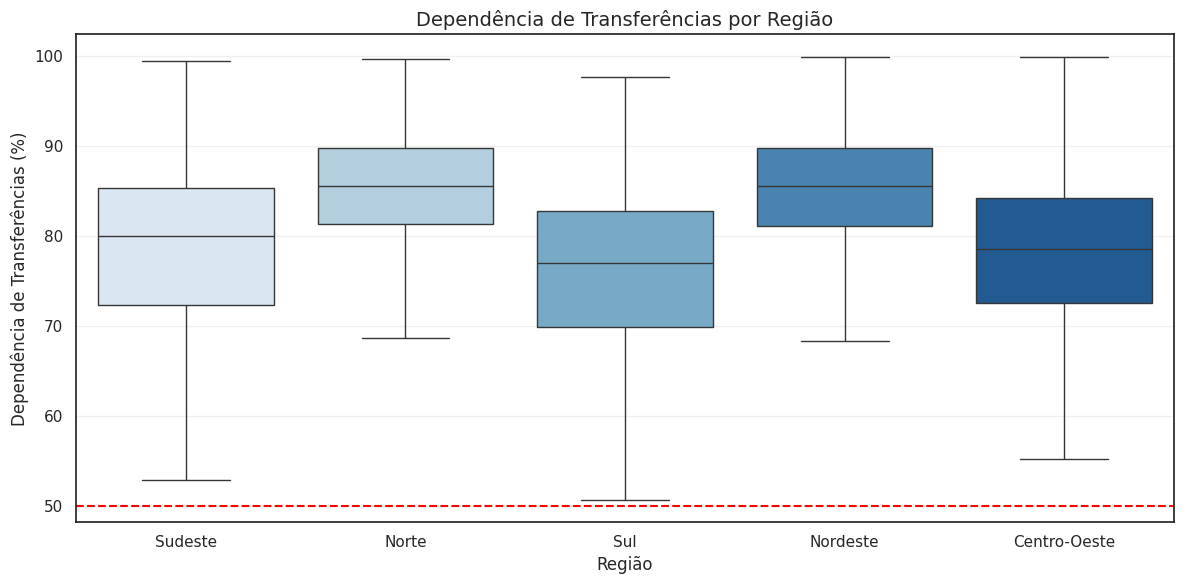

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=dados_filtrados.join(dados[['Regiao']]),
    x='Regiao',
    y='Dependencia_Transferencias',
    palette='Blues',
    showfliers=False
)

plt.title('Dependência de Transferências por Região', fontsize=14)
plt.xlabel('Região')
plt.ylabel('Dependência de Transferências (%)')
plt.axhline(y=50, color='red', linestyle='--')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()





Analisando o boxplot, nota-se que as regiões Norte e Nordeste exibem as maiores medianas de dependência. O Sul destaca-se com a menor mediana, enquanto Sudeste e Centro-Oeste apresentam valores intermediários. Todas as regiões mostram grande amplitude nos dados, com valores máximos próximos a 100% e mínimos variando entre 50-70%. Este gráfico confirma o padrão de maior dependência nas regiões Norte e Nordeste e menor dependência no Sul, refletindo as desigualdades regionais.

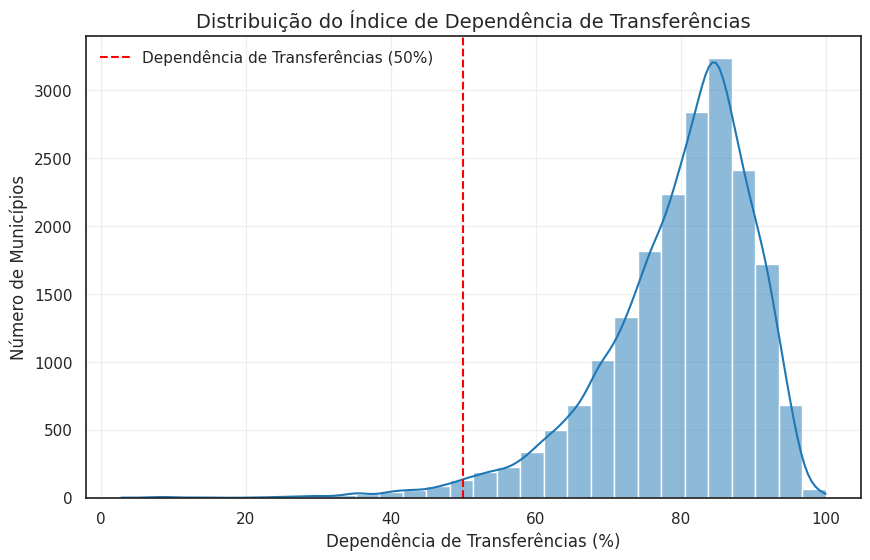

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=dados_filtrados,
    x='Dependencia_Transferencias',
    bins=30,
    kde=True,
    color='#1f77b4'
)
plt.axvline(x=50, color='red', linestyle='--', label='Dependência de Transferências (50%)')
plt.title('Distribuição do Índice de Dependência de Transferências', fontsize=14)
plt.xlabel('Dependência de Transferências (%)')
plt.ylabel('Número de Municípios')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Nota-se que a maior concentração de municípios apresenta dependência entre 80-85% das suas receitas. Praticamente todos os municípios ultrapassam o limite de 50%, com a distribuição fortemente concentrada à direita. Observa-se um pequeno grupo de municípios com dependência baixa. A distribuição assimétrica à esquerda revela que a imensa maioria dos municípios brasileiros depende criticamente de transferências intergovernamentas.

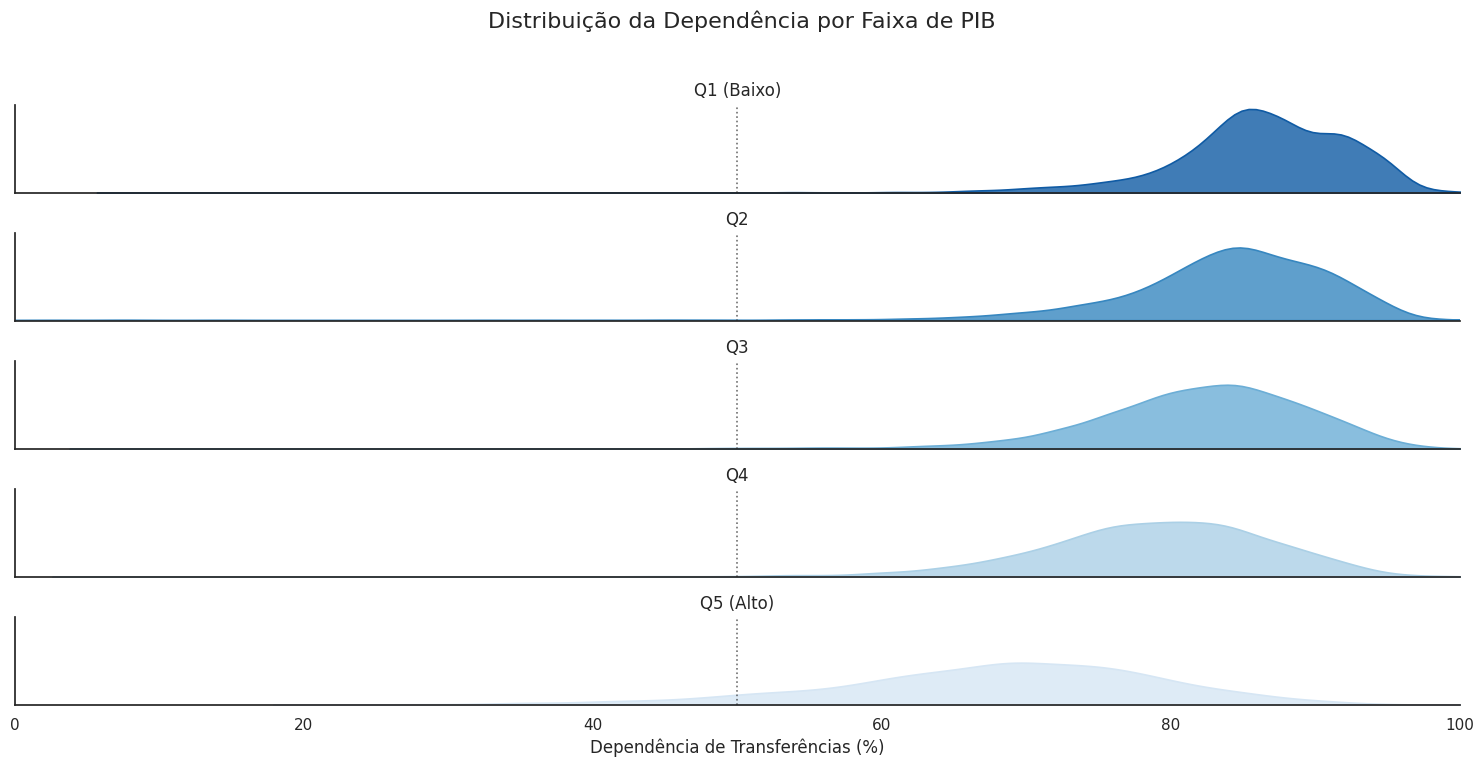

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dados_filtrados['Faixa_PIB'] = pd.qcut(dados_filtrados['PIB'],
                                       q=5,
                                       labels=['Q1 (Baixo)', 'Q2', 'Q3', 'Q4', 'Q5 (Alto)'])

g = sns.FacetGrid(
    dados_filtrados,
    row='Faixa_PIB',
    hue='Faixa_PIB',
    aspect=10,
    height=1.5,
    palette='Blues_r',
    xlim=(0, 100)
)

g.map(sns.kdeplot, 'Dependencia_Transferencias',
     fill=True,
     alpha=0.8,
     linewidth=1.2)

def ref_line(x, **kwargs):
    plt.axvline(x=50, color='#333333', linestyle=':', linewidth=1.2, alpha=0.7)
g.map(ref_line, 'Dependencia_Transferencias')

g.fig.suptitle('Distribuição da Dependência por Faixa de PIB',
              y=1.02,
              fontsize=16,
              fontweight='normal')

g.set(
    ylabel="",
    xlabel="Dependência de Transferências (%)"
)
g.set_titles(row_template='{row_name}')
g.set(yticks=[])

plt.subplots_adjust(hspace=0.25)
plt.tight_layout()
plt.show()


Observa-se um padrão claro e inverso ao mostrado anteriormente para autonomia: quanto menor o PIB municipal, maior a dependência de transferências, com concentração entre 80-90%. À medida que o PIB aumenta, as distribuições se deslocam gradualmente para a esquerda, indicando menor dependência. Na faixa de PIB mais alta, a distribuição é mais ampla e centrada em valores menores, embora ainda significativos. A linha pontilhada vertical (50%) serve como referência, mostrando que a grande maioria dos municípios, mesmo os com maior PIB, mantém dependência acima desse limiar. Esta visualização confirma a relação inversa entre capacidade econômica e dependência de transferências intergovernamentais no contexto municipal brasileiro.

## 🔷 Conclusão

Por fim, ao analisar os gráficos relacionados ao PIB, à dependência financeira e à autonomia financeira dos municípios, foi possível identificar algumas relações relevantes e tirar conclusões importantes. Observa-se que o PIB exerce influência sobre os indicadores municipais e varia de acordo com a região e as variáveis analisadas. No entanto, ele não é o único fator determinante para os resultados obtidos. De modo geral, a autonomia financeira e a dependência de transferências apresentam uma relação inversa, ou seja, são variáveis antagonistas. Apesar disso, é evidente que a maioria dos municípios apresenta maior índice de dependência financeira do que de autonomia. Além disso, como já mencionado, o PIB não é o principal fator explicativo, uma vez que há cidades com PIB relativamente baixo que demonstram altos níveis de autonomia e baixa dependência de transferências. Isso indica a existência de outros fatores determinantes, como densidade populacional, localização geográfica, nível de desenvolvimento, investimentos em tecnologia, estrutura econômica e até características ambientais como vegetação e uso do solo.


#**📦🌽 Análise da Relação entre Exportações e Produção Agrícola e Pecuária**

Neste tópico, foi realizada uma análise sobre a relação entre as exportações e a produção agrícola e pecuária nos municípios. A partir dos dados disponíveis, investigou-se como o desempenho exportador impacta as atividades do agronegócio, com foco em entender se regiões com maior participação nas exportações também apresentam maior concentração de atividades ligadas à agricultura e pecuária. O estudo visa compreender a correlação entre esses fatores e como o agronegócio influencia as dinâmicas econômicas locais.



## 🔷 Análise estatística e descritiva dos dados

Para essa análise, foram ajustadas as variáveis para refletir corretamente as unidades de medida. O PIB foi convertido para unidades reais (R$) com a criação da variável "PIB_real". As áreas plantada e colhida foram ajustadas para metros quadrados, criando-se "AreaColhida_real" e "AreaPlantada_real". As produções agrícola e pecuária foram corrigidas para valores reais, criando as variáveis "ProducaoAgricola_real" e "ProducaoPecuaria_real". Com essas modificações, foram geradas estatísticas descritivas dessas variáveis, com formatação adequada para facilitar a visualização.

In [43]:
import pandas as pd
import numpy as np

dados['PIB_real'] = dados['PIB'] * 1000
dados['AreaColhida_real'] = dados['AreaColhida_h'] * 10000
dados['AreaPlantada_real'] = dados['AreaPlantada_h'] * 10000
dados['ProducaoAgricola_real'] = dados['VlProducaoAgricola'] * 1000
dados['ProducaoPecuaria_real'] = dados['VlProducaoPecuaria'] * 1000

dados_filtrados = dados[
    (dados['PIB_real'] != 0) &
    (dados['ProducaoPecuaria_real'] != 0) &
    (dados['ProducaoAgricola_real'] != 0) &
    (dados['AreaColhida_real'] != 0) &
    (dados['AreaPlantada_real'] != 0) &
    (dados['Exportacoes_US$'] != 0)
]


estatisticas = dados_filtrados[['PIB_real', 'ProducaoPecuaria_real', 'ProducaoAgricola_real', 'AreaColhida_real', 'AreaPlantada_real', 'Exportacoes_US$']].describe()

estatisticas_formatadas = estatisticas.style \
    .format("{:,.2f}", na_rep="-") \
    .set_caption("Estatísticas Descritivas das Variáveis Econômicas e de Produção Ajustadas")

#estatisticas_formatadas


Com o objetivo de proporcionar uma melhor visualização dos dados analisados, foi elaborada a tabela formatada apresentada a seguir, contendo os resultados obtidos.

### 🔸 Estatísticas Descritivas das Variáveis Econômicas e de Produção Ajustadas

| Estatística  | PIB_real           | ProducaoPecuaria_real | ProducaoAgricola_real | AreaColhida_real | AreaPlantada_real | Exportacoes_US$    |
|--------------|--------------------|------------------------|------------------------|------------------|-------------------|---------------------|
| count        | 5,682.00           | 5,682.00               | 5,682.00               | 5,682.00         | 5,682.00          | 5,682.00            |
| mean         | 2,699,586,577.79   | 446,388.24             | 2,218,498.42           | 5,916,657.87     | 5,944,288.98      | 56,429,943.38       |
| std          | 18,552,526,588.57  | 1,078,093.34           | 2,890,270.27           | 13,979,542.85    | 13,990,772.84     | 358,421,513.17      |
| min          | 35,773,000.00      | 10,000.00              | 10,000.00              | 100,000.00       | 100,000.00        | 27.00               |
| 25%          | 326,912,250.00     | 50,000.00              | 290,000.00             | 500,000.00       | 500,000.00        | 88,669.00           |
| 50% (mediana)| 714,911,000.00     | 90,000.00              | 730,000.00             | 1,100,000.00     | 1,100,000.00      | 1,086,448.00        |
| 75%          | 1,674,049,000.00   | 560,000.00             | 3,567,500.00           | 2,600,000.00     | 6,300,000.00      | 9,502,468.75        |
| max          | 763,597,808,000.00 | 9,950,000.00           | 9,980,000.00           | 99,800,000.00    | 99,800,000.00     | 10,093,342,569.00   |


Em seguida, as varíáveis referentes à exportações, produção agrícola e pecuária foram agrupadas por região e analisadas a fim de encontrar alguma correlação.

In [109]:
import pandas as pd

dados_agregados1 = dados_filtrados.groupby(['Regiao'])[['Exportacoes_US$', 'ProducaoPecuaria_real', 'ProducaoAgricola_real']].sum().reset_index()
dados_agregados_ordenados1 = dados_agregados1.sort_values(by=['Regiao'])

#dados_agregados_ordenados1


### 🔸 Valores de Exportações, Produção Agrícola e Pecuária por Região
| Região       | Exportações_US$ | ProduçãoPecuária_real | ProduçãoAgrícola_real |
|--------------|------------------|------------------------|------------------------|
| Centro-Oeste | 3.335694e+10     | 352540000              | 2034001000             |
| Nordeste     | 2.367999e+10     | 261800000              | 843403000              |
| Norte        | 7.068866e+09     | 61860000               | 493404000              |
| Sudeste      | 1.573163e+11     | 913278000              | 4583056000             |
| Sul          | 9.921281e+10     | 946900000              | 4651644000             |



Com base na análise da tabela, observa-se que a região Sudeste apresenta o maior valor em exportações, enquanto a região Sul se destaca com os maiores números em produção pecuária e produção agrícola. Diante desses resultados, é pertinente questionar se há alguma correlação entre os níveis de produção (pecuária e agrícola) e o volume de exportações nas diferentes regiões do país.


## 🔷 Análise gráfica dos dados

A partir dos resultados encontrados na estatística descritiva, neste tópico serão apresentados alguns gráficos baseados nos dados analisados e nos resultados obtidos, com o objetivo de compreender suas correlações e iniciar o processo de resposta à pergunta levantada.

Para a construção dos gráficos, foram aplicados filtros apropriados conforme o interesse da análise, desconsiderando colunas sem preenchimento ou com valores não significativos. Os dados foram agrupados por região e ano, e foram utilizadas escalas diferentes para melhorar a visualização.

**Pergunta: Existe uma correlação entre as exportações e a produção agrícola e pecuária? Regiões com maior foco nas exportações também são aquelas com maior concentração de atividades do agronegócio?**

### 📈 🌾📦 Gráficos de Exportações, Produções Agrícola e Pecurária, e suas Relações


A seguir, apresentam-se os gráficos referentes às exportações, produção agrícola e pecuária. Para a construção desses gráficos, os dados foram agrupados por ano e região, a fim de facilitar a visualização. Além disso, as variáveis selecionadas são analisadas para verificar possíveis correlações entre elas.

In [70]:
import pandas as pd

dados_agregados = dados_filtrados.groupby(['Ano', 'Regiao'])[['Exportacoes_US$', 'ProducaoPecuaria_real', 'ProducaoAgricola_real']].sum().reset_index()
dados_agregados_ordenados = dados_agregados.sort_values(by=['Regiao'])



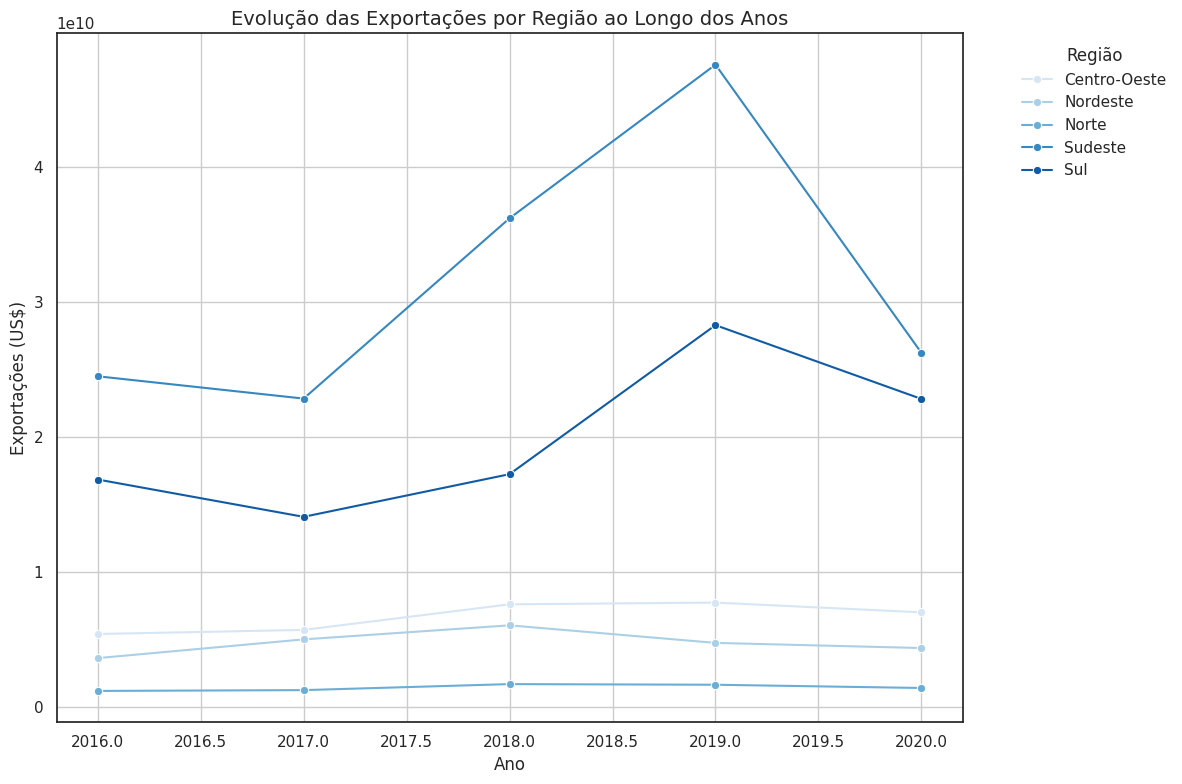

In [71]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=dados_agregados, x='Ano', y='Exportacoes_US$', hue='Regiao', marker='o', palette='Blues')
plt.title('Evolução das Exportações por Região ao Longo dos Anos', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Exportações (US$)')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Analisando o gráfico, pode-se observar que A região Sudeste destaca-se claramente como a maior exportadora do país. A região Sul aparece em segundo lugar. Observa-se que todas as regiões apresentaram uma queda ou estagnação em torno de 2020, provavelmente refletindo o impacto da pandemia de COVID-19, seguida por uma recuperação significativa em 2021. As regiões Norte e Centro-Oeste mantiveram-se com os menores valores de exportação, embora ambas demonstrem crescimento no último ano analisado.

### 📈 🌽 Produção Agrícola

A seguir, são apresentados gráficos relacionados à produção agrícola em conjunto com outras variáveis, a fim de observar se há alguma correlação.

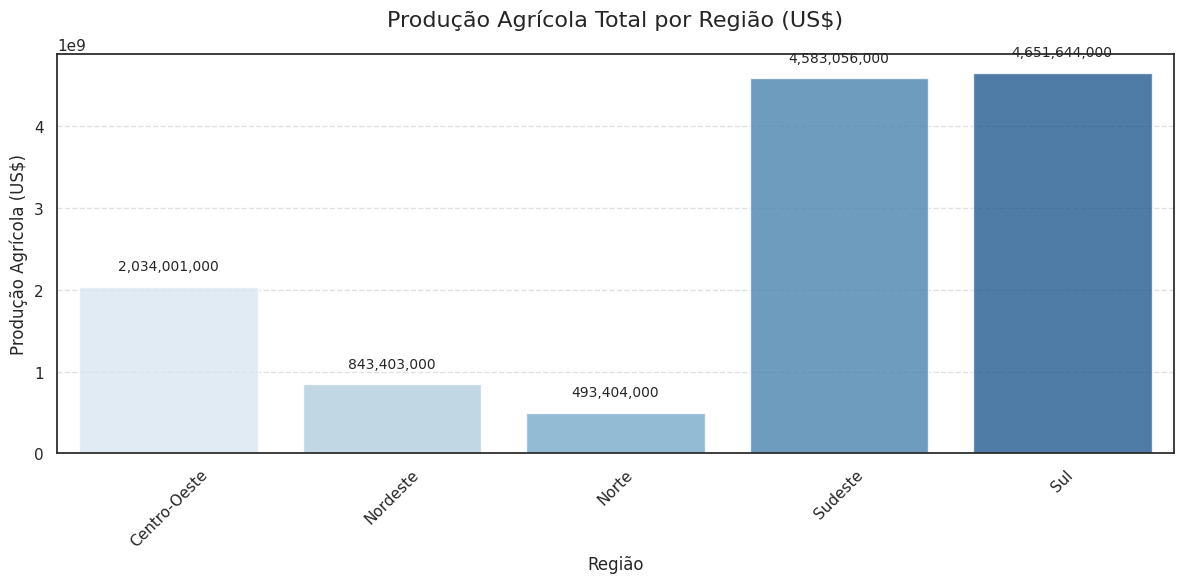

In [73]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=dados_agregados,
    x='Regiao',
    y='ProducaoAgricola_real',
    estimator=sum,
    palette='Blues',
    ci=None,
    alpha=0.8
)

plt.title('Produção Agrícola Total por Região (US$)', fontsize=16, pad=20)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Produção Agrícola (US$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 15),
        textcoords='offset points',
        fontsize=10
    )

plt.tight_layout()
plt.show()

Os valores da produção agrícola total evidenciam disparidades marcantes: Sudeste e Sul dominam o cenário da produção nacional, enquanto o Centro-Oeste contribui com US$ 2 bilhões. O contraste com Nordeste e Norte reflete não apenas diferenças em condições naturais, mas também em investimentos, tecnologia e políticas de desenvolvimento regional.

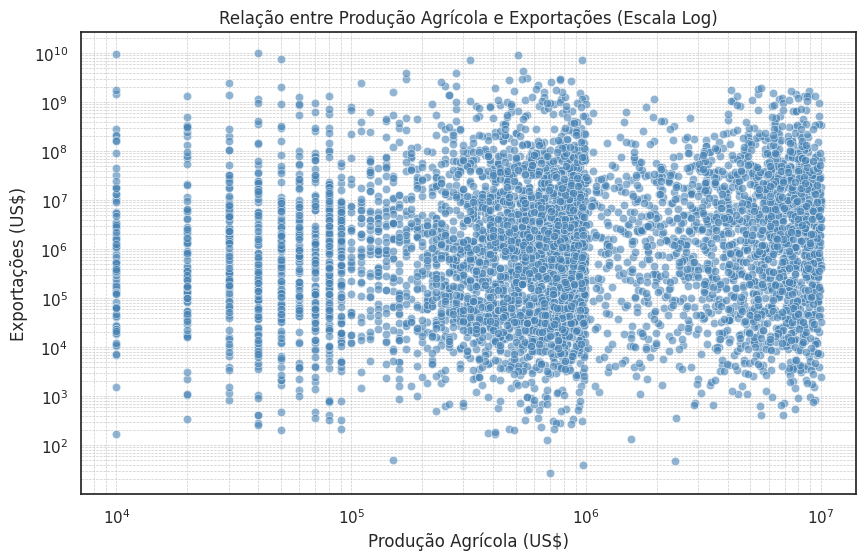

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=dados_filtrados['ProducaoAgricola_real'],
    y=dados_filtrados['Exportacoes_US$'],
    color='steelblue',
    alpha=0.6
)
plt.xscale('log')
plt.yscale('log')
plt.title('Relação entre Produção Agrícola e Exportações (Escala Log)')
plt.xlabel('Produção Agrícola (US$)')
plt.ylabel('Exportações (US$)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


Considerando o gráfico é possível observar que os dados estão amplamente distribuídos, indicando grande variação nos valores das variáveis analisadas. Apesar da dispersão, nota-se uma leve tendência de correlação positiva, sugerindo que regiões com maior produção agrícola tendem a apresentar também maiores exportações. Contudo, essa relação não é forte nem linear, refletindo a complexidade dos fatores que influenciam as exportações além da produção agrícola. A utilização da escala logarítmica permitiu uma visualização mais clara dessa relação, especialmente para dados que variam em ordens de magnitude muito distintas.


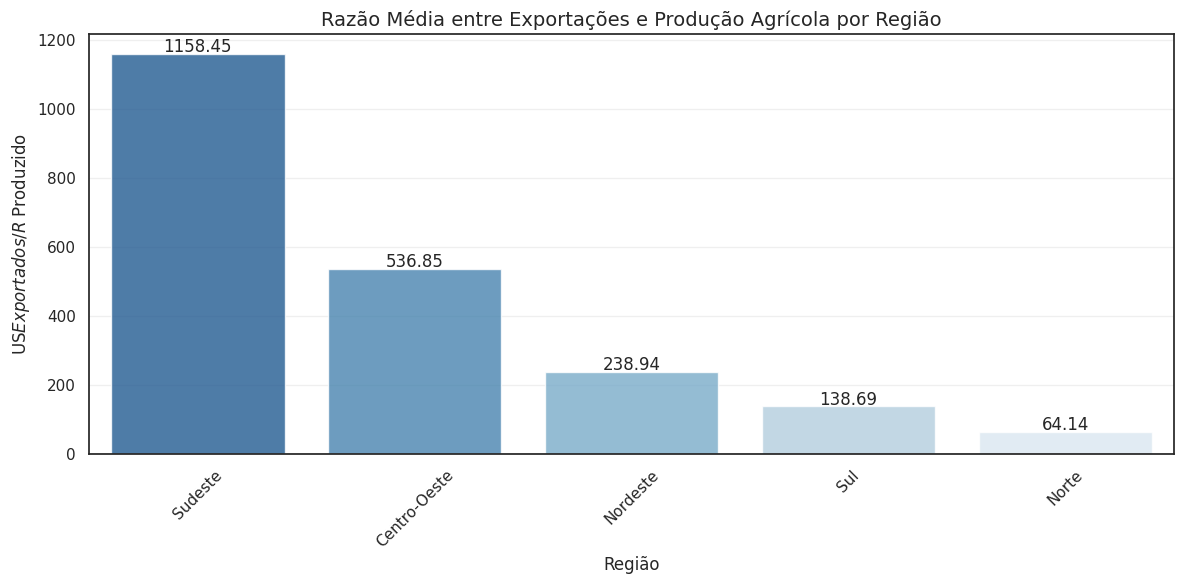

In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dados_filtrados['Razao_Export_Agro'] = np.where(
    dados_filtrados['ProducaoAgricola_real'] > 0,
    dados_filtrados['Exportacoes_US$'] / dados_filtrados['ProducaoAgricola_real'],
    np.nan
)

dados_razao = dados_filtrados.dropna(subset=['Razao_Export_Agro']).groupby('Regiao')['Razao_Export_Agro'].mean().reset_index()

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=dados_razao.sort_values('Razao_Export_Agro', ascending=False),
    x='Regiao',
    y='Razao_Export_Agro',
    palette='Blues_r',
    alpha=0.8
)

for p in barplot.patches:
    barplot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 5), textcoords='offset points'
    )

plt.title('Razão Média entre Exportações e Produção Agrícola por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('US$ Exportados / R$ Produzido', fontsize=12)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


O gráfico destaca que o Sudeste consegue exportar muito mais que as demais regiões. Sul e Centro-Oeste apresentam desempenho intermediário, enquanto Norte e Nordeste ficam com valores próximos entre si. Essa vantagem expressiva do Sudeste provavelmente reflete sua melhor infraestrutura logística, além de possível maior valor agregado nos produtos exportados.


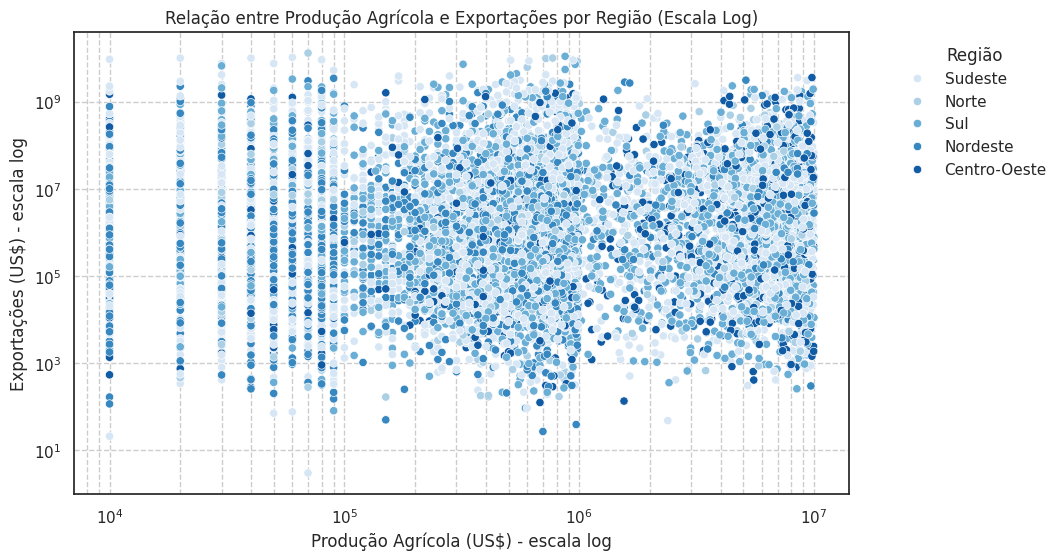

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='ProducaoAgricola_real', y='Exportacoes_US$', hue='Regiao', palette='Blues')
plt.xscale('log')
plt.yscale('log')
plt.title('Relação entre Produção Agrícola e Exportações por Região (Escala Log)')
plt.xlabel('Produção Agrícola (US$) - escala log')
plt.ylabel('Exportações (US$) - escala log')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--")
plt.show()


O gráfico em escala logarítmica revela que, apesar da grande variação nos valores de produção agrícola e exportações, não há uma relação linear clara entre os dois indicadores para as diferentes regiões do país. Observa-se que a produção agrícola varia amplamente em todas as regiões, mas as exportações não acompanham proporcionalmente esse aumento, indicando que maiores volumes de produção nem sempre resultam em exportações proporcionais. Além disso, as regiões Nordeste e Norte apresentam maior dispersão nos valores de exportação, enquanto as regiões Centro-Oeste e Sudeste tendem a concentrar produções e exportações em faixas mais elevadas, sugerindo diferenças estruturais regionais na capacidade exportadora e no perfil produtivo agrícola.


### 📈 🐮Produção Pecuária

Nesta etapa, são apresentados gráficos relacionados à produção pecuária em conjunto com outras variáveis, a fim de observar se há alguma correlação.

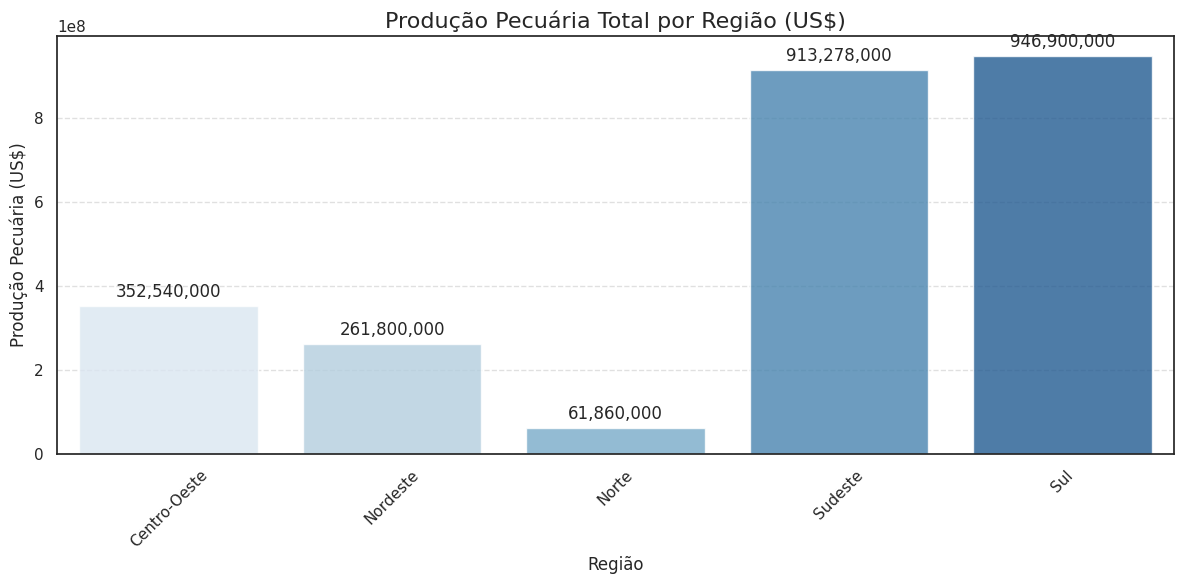

In [103]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=dados_agregados,
    x='Regiao',
    y='ProducaoPecuaria_real',
    estimator=sum,
    palette='Blues',
    ci=None,
    alpha=0.8
)
plt.title('Produção Pecuária Total por Região (US$)', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Produção Pecuária (US$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()


O gráfico apresenta a produção pecuária total por região brasileira em valores absolutos (US).A região Sudeste lidera com um valor expressivo, seguida pela região Sul. O Nordeste ocupa a terceira posição, enquanto o Centro-Oeste e o Norte apresentam os menores valores, respectivamente. Esta distribuição evidencia uma concentração da produção pecuária nas regiões mais industrializadas do país (Sudeste e Sul), que juntas representam mais de 60% do valor total da produção pecuária nacional.

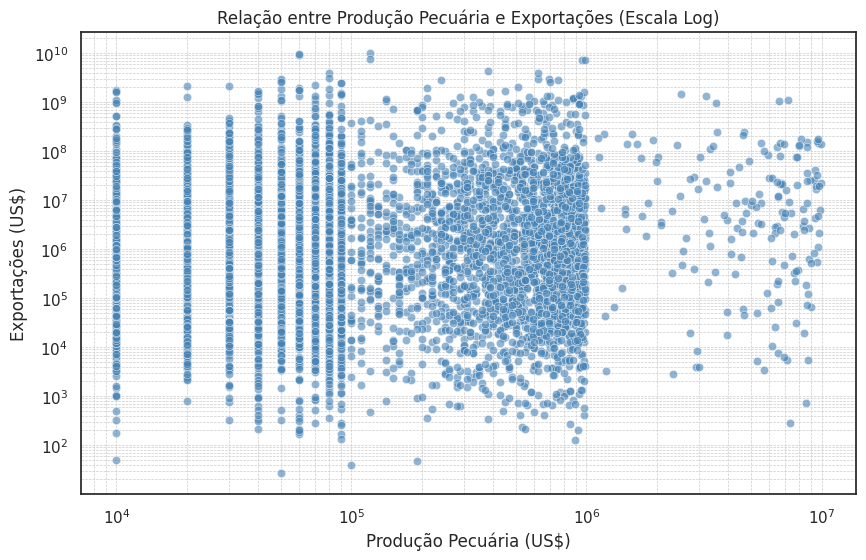

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=dados_filtrados['ProducaoPecuaria_real'],
    y=dados_filtrados['Exportacoes_US$'],
    color='steelblue',
    alpha=0.6
)
plt.xscale('log')
plt.yscale('log')
plt.title('Relação entre Produção Pecuária e Exportações (Escala Log)')
plt.xlabel('Produção Pecuária (US$)')
plt.ylabel('Exportações (US$)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


O gráfico mostra a relação entre a produção pecuária e as exportações em escala logarítmica, evidenciando uma grande dispersão dos dados em todas as faixas de produção pecuária. Observa-se que, apesar do aumento da produção pecuária, não há uma tendência clara de crescimento proporcional nas exportações, indicando que altos níveis de produção não necessariamente se traduzem em maiores volumes exportados. Além disso, a concentração de pontos em valores baixos de produção sugere que muitos municípios ou regiões possuem produção pecuária limitada, com exportações também variadas. Essa dispersão pode indicar a influência de outros fatores além da produção que impactam as exportações, como infraestrutura, políticas comerciais e demanda internacional.


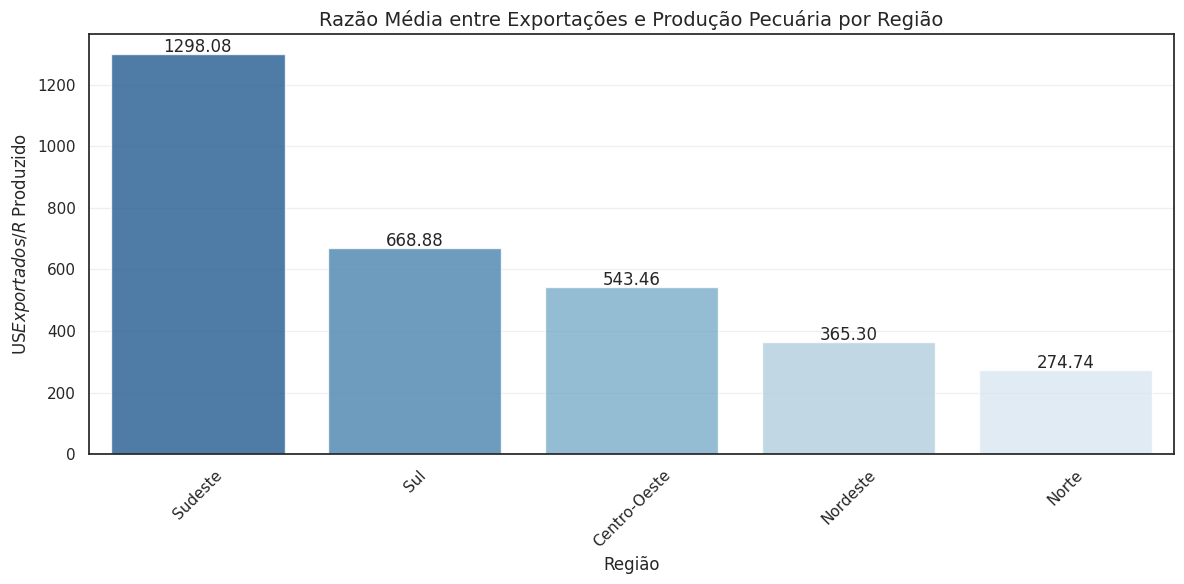

In [108]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dados_filtrados['Razao_Export_Agro'] = np.where(
    dados_filtrados['ProducaoPecuaria_real'] > 0,
    dados_filtrados['Exportacoes_US$'] / dados_filtrados['ProducaoPecuaria_real'],
    np.nan
)

dados_razao = dados_filtrados.dropna(subset=['Razao_Export_Agro']).groupby('Regiao')['Razao_Export_Agro'].mean().reset_index()

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=dados_razao.sort_values('Razao_Export_Agro', ascending=False),
    x='Regiao',
    y='Razao_Export_Agro',
    palette='Blues_r',
    alpha=0.8
)

for p in barplot.patches:
    barplot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 5), textcoords='offset points'
    )

plt.title('Razão Média entre Exportações e Produção Pecuária por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('US$ Exportados / R$ Produzido', fontsize=12)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observa-se que o Sudeste lidera com folga, apresentando a maior razão, seguido pelas regiões Sul e Centro-Oeste. As regiões Nordeste e Norte aparecem com valores inferiores. Esse resultado sugere que, proporcionalmente, o Sudeste é a região que mais converte sua produção pecuária em exportações, enquanto o Norte apresenta a menor eficiência relativa nesse aspecto.

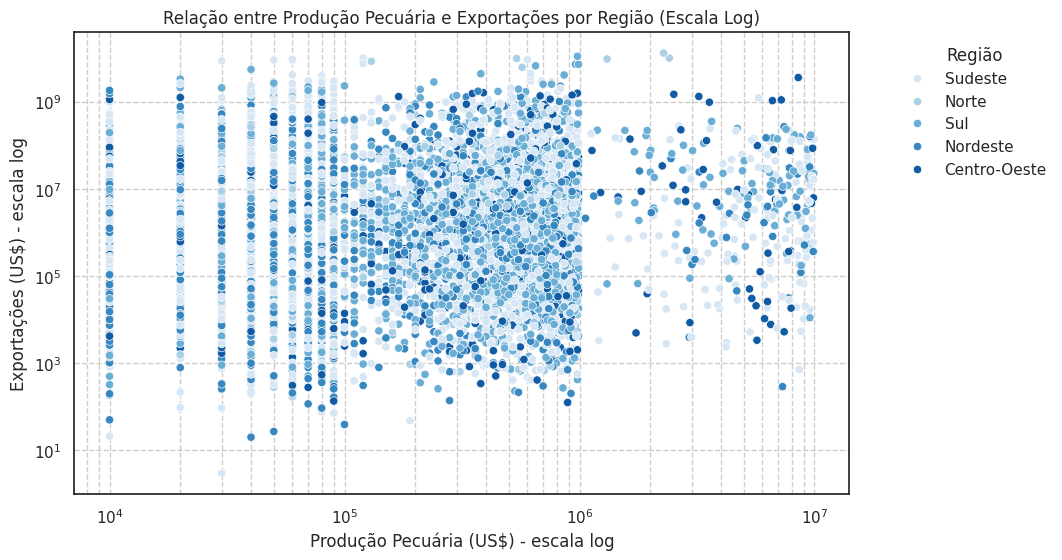

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='ProducaoPecuaria_real', y='Exportacoes_US$', hue='Regiao', palette='Blues')
plt.xscale('log')
plt.yscale('log')
plt.title('Relação entre Produção Pecuária e Exportações por Região (Escala Log)')
plt.xlabel('Produção Pecuária (US$) - escala log')
plt.ylabel('Exportações (US$) - escala log')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--")
plt.show()



O gráfico apresenta a relação entre a produção pecuária e as exportações por região brasileira, ambos em escala logarítmica. A dispersão dos pontos mostra que não há uma correlação linear evidente entre os dois fatores, mas é possível observar que as regiões Centro-Oeste e Sul concentram os maiores valores de produção pecuária e exportações, sugerindo maior participação dessas regiões no mercado exportador ligado à pecuária. O Nordeste, por sua vez, possui muitos pontos em faixas de produção mais baixa e exportações reduzidas, indicando menor expressividade nesse setor. Já o Sudeste e o Norte aparecem com distribuições mais espalhadas, mas sem dominância clara. Esses padrões indicam que, embora a produção pecuária seja um fator relevante, a capacidade exportadora também depende de outras condições regionais.


## 🔷 Conclusão

Desse modo, ao analisar os gráficos plotados, é possível perceber que existe uma relação entre exportações e as produções agrícolas e pecuárias em algumas regiões e municípios, porém essa relação não é determinante nem segue um padrão uniforme. Há locais com baixos índices de produção agrícola e pecuária que apresentam alto volume de exportação, assim como municípios que possuem tanto alta produção quanto alta exportação. Nota-se também que as regiões Sul e Sudeste tendem a apresentar índices mais elevados dessas variáveis, evidenciando as desigualdades regionais. No entanto, a relação entre produção e exportação não é estrita, o que indica que outros fatores influenciam esses indicadores. As produções agrícolas e pecuárias podem estar relacionadas a condições como vegetação, disponibilidade de recursos naturais, nível tecnológico e estrutura econômica local. Já as exportações podem incluir outros produtos, como bens industriais, minérios, petróleo, produtos químicos, papel e celulose, entre outros, não estando necessariamente ligadas à produção agropecuária do município.
